In [1]:
# Import libraries
!pip install matplotlib
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
# link of dataset : https://www.kaggle.com/datasets/yasserh/walmart-dataset
df = pd.read_csv("C:/Users/bhavesh/Desktop/learn jupyter/Walmart_Store_sales.csv")  # Update the correct path


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Display first few rows
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


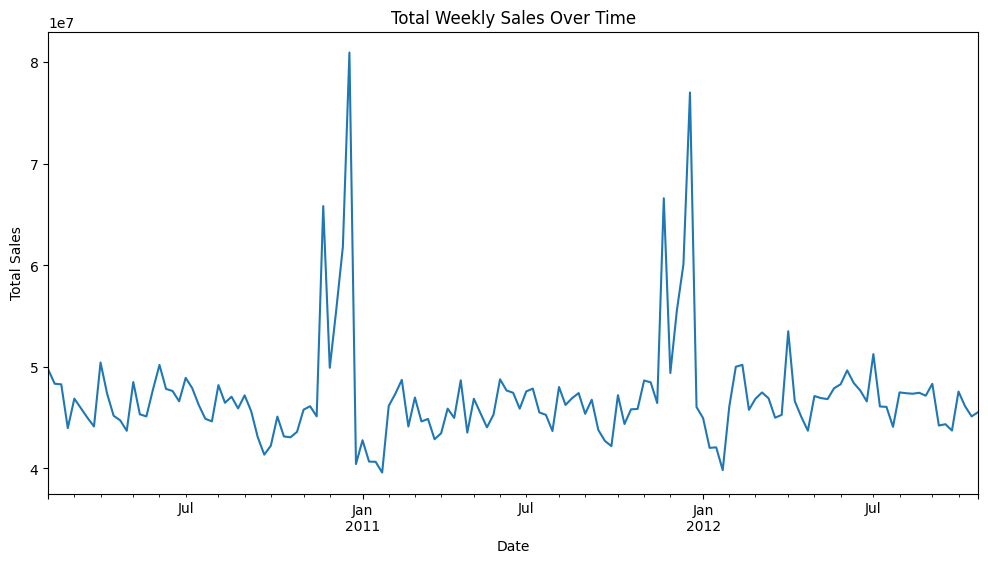

In [7]:
plt.figure(figsize=(12,6))
df.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

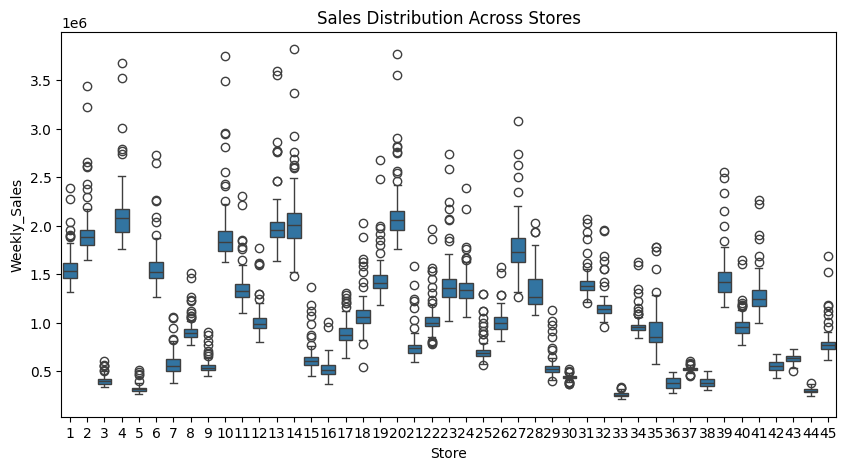

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Store', y='Weekly_Sales', data=df)
plt.title("Sales Distribution Across Stores")
plt.show()

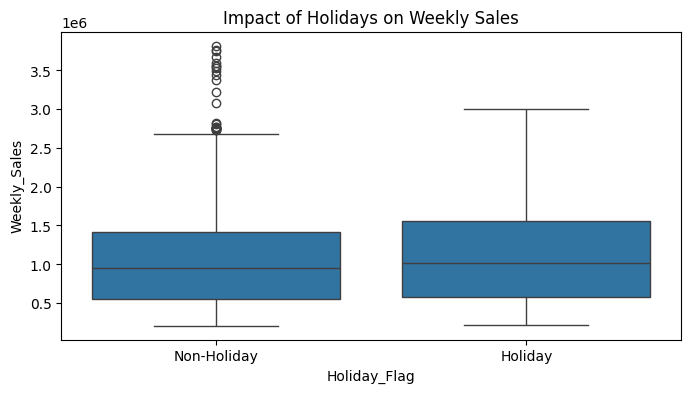

In [9]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Holiday_Flag", y="Weekly_Sales", data=df)
plt.title("Impact of Holidays on Weekly Sales")
plt.xticks([0,1], ["Non-Holiday", "Holiday"])
plt.show()

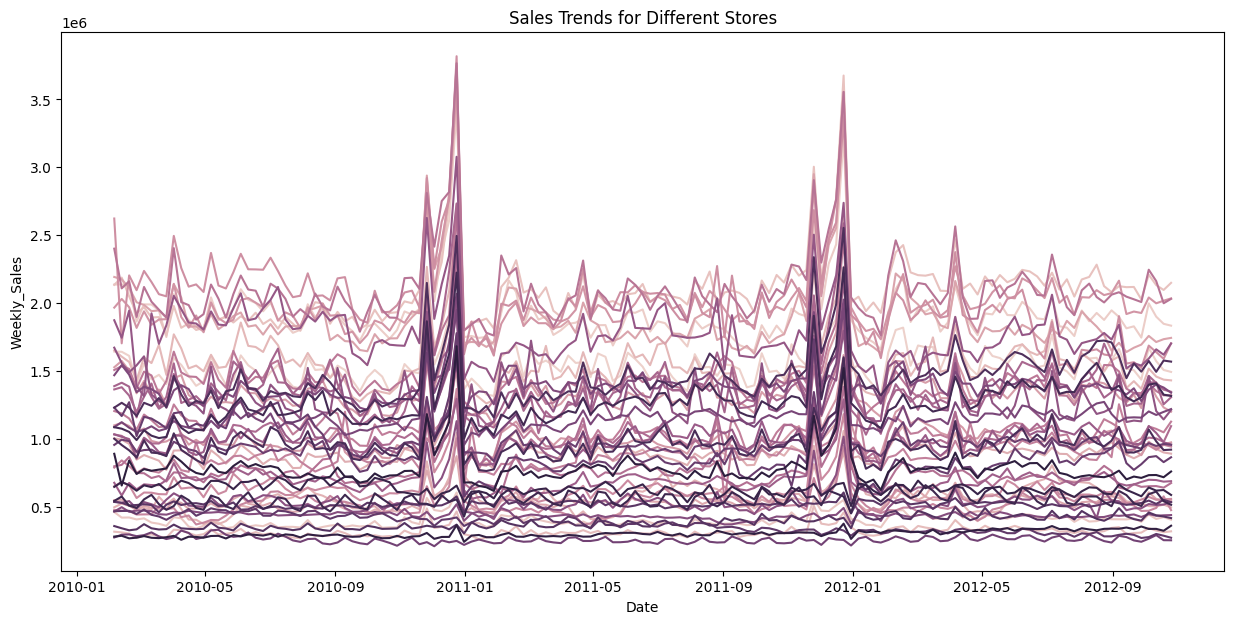

In [10]:
plt.figure(figsize=(15,7))
sns.lineplot(x="Date", y="Weekly_Sales", hue="Store", data=df, legend=False)
plt.title("Sales Trends for Different Stores")
plt.show()

<span style="font-size:10pt; font-weight:bold; color:blue;">Find the Date with the Highest Sale</span>

In [11]:
highest_sales_date = df.loc[df['Weekly_Sales'].idxmax(), ['Date', 'Weekly_Sales']]
print(highest_sales_date)

Date            2010-12-24 00:00:00
Weekly_Sales             3818686.45
Name: 1905, dtype: object


<span style="font-size:10pt; font-weight:bold; color:blue;">Which month or year had the highest sales:</span>

In [12]:
df['YearMonth'] = df['Date'].dt.to_period('M')  # Extract Year-Month
monthly_sales = df.groupby('YearMonth')['Weekly_Sales'].sum()
highest_month = monthly_sales.idxmax()

print(f"Month with highest sales: {highest_month}, Total Sales: {monthly_sales.max()}")

Month with highest sales: 2010-12, Total Sales: 288760532.72


<span style="font-size:10pt; font-weight:bold; color:blue;">The best year the one with the highest total sales:</span>

In [13]:
df['Year'] = df['Date'].dt.year  # Extract Year
yearly_sales = df.groupby('Year')['Weekly_Sales'].sum()
highest_year = yearly_sales.idxmax()

print(f"Year with highest sales: {highest_year}, Total Sales: {yearly_sales.max()}")

Year with highest sales: 2011, Total Sales: 2448200007.35


<span style="font-size:10pt; font-weight:bold; color:blue;">To find which stores performed the best, you can check for the store with the highest total sales.</span>

In [14]:
# Group by 'Store' and sum the 'Weekly_Sales' column
best_performing_store = df.groupby('Store')['Weekly_Sales'].sum().idxmax()
highest_sales = df.groupby('Store')['Weekly_Sales'].sum().max()

print(f"The best-performing store is Store {best_performing_store} with total sales of ${highest_sales:,.2f}")

The best-performing store is Store 20 with total sales of $301,397,792.46


<span style="font-size:10pt; font-weight:bold; color:blue;">To analyze whether holidays impacted sales significantly, we can compare the average sales on holiday weeks versus non-holiday weeks.</span>

In [15]:
# Check if 'Holiday_Flag' column exists, else update the column name accordingly
if 'Holiday_Flag' in df.columns:
    holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
    non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()

    print(f"Average Sales on Holidays: ${holiday_sales:,.2f}")
    print(f"Average Sales on Non-Holidays: ${non_holiday_sales:,.2f}")

    if holiday_sales > non_holiday_sales:
        print("Sales were higher on holidays.")
    else:
        print("Sales were lower on holidays.")
else:
    print("Column 'Holiday_Flag' not found. Check the dataset structure.")


Average Sales on Holidays: $1,122,887.89
Average Sales on Non-Holidays: $1,041,256.38
Sales were higher on holidays.


<span style="font-size:10pt; font-weight:bold; color:blue;"> 
Are there any seasonal trends?
</span>

<span style="font-size:10pt; font-weight:bold; color:blue;"> 
1. Convert the Date Column to Datetime Format
Since sales data is recorded over time, we need to ensure the Date column is in the correct format:
</span>

In [18]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Adjust if necessary
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.to_period("Q")


<span style="font-size:10pt; font-weight:bold; color:blue;"> 
2. Visualizing Monthly Trends
A line plot of average sales per month will help identify seasonal patterns:
</span>

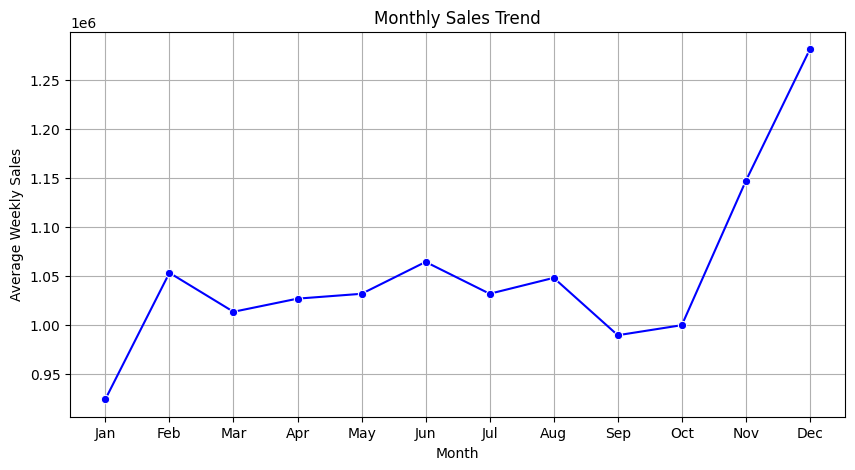

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by month and calculate mean sales
monthly_sales = df.groupby("Month")["Weekly_Sales"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color="blue")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.title("Monthly Sales Trend")
plt.grid()
plt.show()


<span style="font-size:10pt; font-weight:bold; color:blue;"> 
3. Check Quarterly Trends
Grouping sales by quarters helps spot broader seasonal trends:
</span>

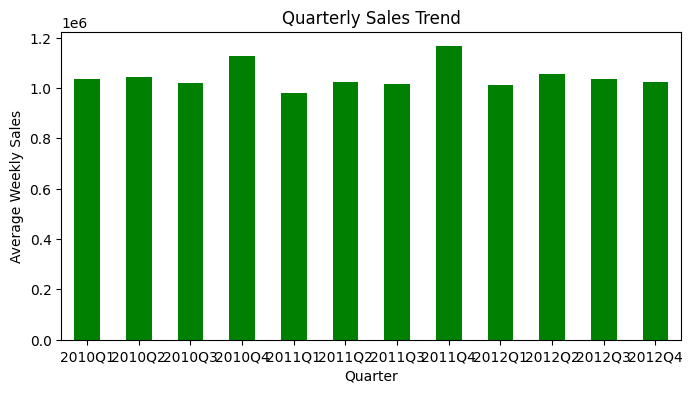

In [20]:
quarterly_sales = df.groupby("Quarter")["Weekly_Sales"].mean()

plt.figure(figsize=(8, 4))
quarterly_sales.plot(kind="bar", color="green")
plt.xlabel("Quarter")
plt.ylabel("Average Weekly Sales")
plt.title("Quarterly Sales Trend")
plt.xticks(rotation=0)
plt.show()


<span style="font-size:10pt; font-weight:bold; color:blue;"> 
 Observations & Insights
If sales peak in Q4 (October–December), this may indicate strong holiday season sales.
If sales dip in Q1 (January–March), it could be due to post-holiday slowdowns.
Summer months (June–August) might show higher sales due to summer shopping trends.
</span>